In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import datetime as dt


def get_news_final(min_popu = 1000):
    news_final = pd.read_csv("../data/News_Final.csv")
    news_final = news_final[news_final["Facebook"]>=min_popu].dropna()
    news_final.index = news_final["IDLink"]
    return news_final

def get_plat_topic(min_popu = 1000, plats = ['Facebook'], topics = ['Economy', 'Microsoft', 'Obama', 'Palestine']):
    plat_topic_dict = {}
    for p in plats:
        for t in topics:
            name = p + '_' + t
            df = pd.read_csv(f"../data/{name}.csv")
            df = df[df["TS144"]>=min_popu]
            df.index = df["IDLink"]
            plat_topic_dict[name] = df
    return plat_topic_dict

def process_news_final(df):
    df_encode = pd.DataFrame(index = df["IDLink"])
    onehot_columns = ['Source','Topic']
    stdscaler_columns = ['SentimentTitle', 'SentimentHeadline']
    
    enc = OneHotEncoder(sparse=False, handle_unknown = 'ignore') 
    onehot_values = enc.fit_transform(df[onehot_columns])
    onehot_catos = enc.categories_
    idx = 0
    for i in range(len(onehot_columns)):
        column = onehot_columns[i]
        catos = onehot_catos[i]
        for j in range(len(catos)):
            name = column + '_' + catos[j]
            df_encode[name] = onehot_values[:,idx]
            idx += 1
            
    scaler = StandardScaler()
    for i in stdscaler_columns:
        df_encode[i] = scaler.fit_transform(df[[i]])
    return df_encode


def process_ts(df):
    df_norm = df.set_index("IDLink")
    #print(df_norm.head())
    df_norm = df_norm.div(df_norm["TS144"],0)
    #print(df_norm.head())
    return df_norm


if __name__ == '__main__':
    news_final = get_news_final(min_popu = 100)
    fb_econ = get_plat_topic(min_popu = 100)["Facebook_Economy"]
    #print(process_news_final(news_final).head())
    #print(process_ts(fb_econ).head())

    



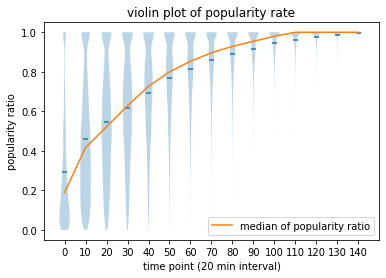

In [5]:
ts_dict = get_plat_topic(1)
fb_econ = process_ts(ts_dict["Facebook_Economy"].append(ts_dict["Facebook_Microsoft"]).append(ts_dict["Facebook_Obama"]).append(ts_dict["Facebook_Palestine"]))
x = fb_econ[fb_econ["TS1"]>0]
plt.figure()
fig1 = plt.violinplot([x["TS"+str(i)] for i in range(1,144,10)], showextrema = False, showmeans = True);
#plt.legend(["violin plot of popularity rate"],loc = 'lower right')
plt.xticks(range(1,16), range(0,144,10));
fig2, = plt.plot(range(1,16), [x["TS"+str(i)].median() for i in range(1,144,10)], label="median of popularity ratio")
plt.legend(handles=[fig2], loc='lower right')
plt.title("violin plot of popularity rate")
plt.xlabel("time point (20 min interval)")
plt.ylabel("popularity ratio")
plt.savefig("../figures/violin plot of popularity rate.png",dpi = 200)

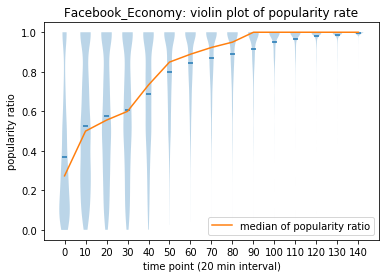

In [6]:
ts_dict = get_plat_topic(1)
tpic = "Facebook_Economy"
fb_econ = process_ts(ts_dict[tpic])
x = fb_econ[fb_econ["TS1"]>0]
plt.figure()
fig1 = plt.violinplot([x["TS"+str(i)] for i in range(1,144,10)], showextrema = False, showmeans = True);
#plt.legend(["violin plot of popularity rate"],loc = 'lower right')
plt.xticks(range(1,16), range(0,144,10));
fig2, = plt.plot(range(1,16), [x["TS"+str(i)].median() for i in range(1,144,10)], label="median of popularity ratio")
plt.legend(handles=[fig2], loc='lower right')
plt.title(f"{tpic}: violin plot of popularity rate")
plt.xlabel("time point (20 min interval)")
plt.ylabel("popularity ratio")
plt.savefig(f"../figures/{tpic} violin plot of popularity rate.png",dpi = 200)

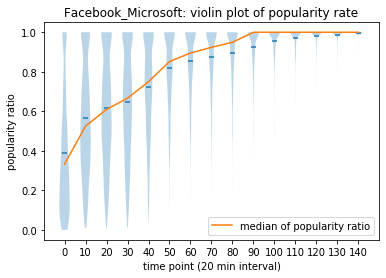

In [7]:
ts_dict = get_plat_topic(1)
tpic = "Facebook_Microsoft"
fb_econ = process_ts(ts_dict[tpic])
x = fb_econ[fb_econ["TS1"]>0]
plt.figure()
fig1 = plt.violinplot([x["TS"+str(i)] for i in range(1,144,10)], showextrema = False, showmeans = True);
#plt.legend(["violin plot of popularity rate"],loc = 'lower right')
plt.xticks(range(1,16), range(0,144,10));
fig2, = plt.plot(range(1,16), [x["TS"+str(i)].median() for i in range(1,144,10)], label="median of popularity ratio")
plt.legend(handles=[fig2], loc='lower right')
plt.title(f"{tpic}: violin plot of popularity rate")
plt.xlabel("time point (20 min interval)")
plt.ylabel("popularity ratio")
plt.savefig(f"../figures/{tpic} violin plot of popularity rate.png",dpi = 200)

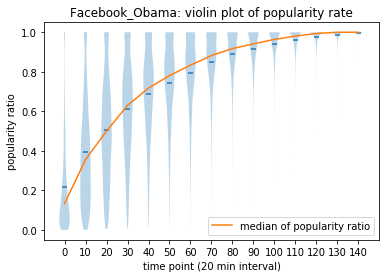

In [8]:
ts_dict = get_plat_topic(1)
tpic = "Facebook_Obama"
fb_econ = process_ts(ts_dict[tpic])
x = fb_econ[fb_econ["TS1"]>0]
plt.figure()
fig1 = plt.violinplot([x["TS"+str(i)] for i in range(1,144,10)], showextrema = False, showmeans = True);
#plt.legend(["violin plot of popularity rate"],loc = 'lower right')
plt.xticks(range(1,16), range(0,144,10));
fig2, = plt.plot(range(1,16), [x["TS"+str(i)].median() for i in range(1,144,10)], label="median of popularity ratio")
plt.legend(handles=[fig2], loc='lower right')
plt.title(f"{tpic}: violin plot of popularity rate")
plt.xlabel("time point (20 min interval)")
plt.ylabel("popularity ratio")
plt.savefig(f"../figures/{tpic} violin plot of popularity rate.png",dpi = 200)

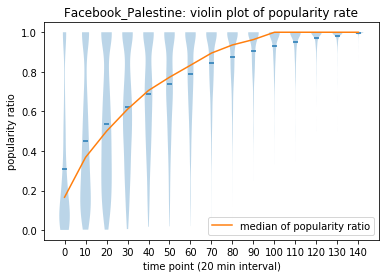

In [9]:
ts_dict = get_plat_topic(1)
tpic = "Facebook_Palestine"
fb_econ = process_ts(ts_dict[tpic])
x = fb_econ[fb_econ["TS1"]>0]
plt.figure()
fig1 = plt.violinplot([x["TS"+str(i)] for i in range(1,144,10)], showextrema = False, showmeans = True);
#plt.legend(["violin plot of popularity rate"],loc = 'lower right')
plt.xticks(range(1,16), range(0,144,10));
fig2, = plt.plot(range(1,16), [x["TS"+str(i)].median() for i in range(1,144,10)], label="median of popularity ratio")
plt.legend(handles=[fig2], loc='lower right')
plt.title(f"{tpic}: violin plot of popularity rate")
plt.xlabel("time point (20 min interval)")
plt.ylabel("popularity ratio")
plt.savefig(f"../figures/{tpic} violin plot of popularity rate.png",dpi = 200)

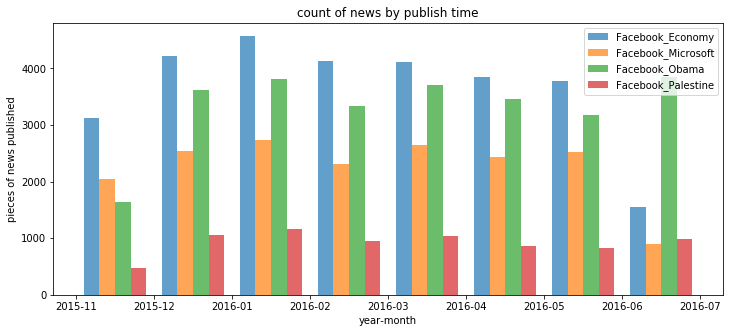

In [11]:
news_final = get_news_final(0)
plat_topic_dict = get_plat_topic(min_popu = 0)
total = []
title = []
for k,v in plat_topic_dict.items():
    title.append(k)
    x = sorted(list(set(v.index)&set(news_final.index)))
    dates = news_final.loc[x]["PublishDate"].values
    total.append([d[:7] for d in dates])
plt.figure(figsize=(12,5))
plt.hist(total,bins = 8,alpha = 0.7)
plt.xlabel("year-month")
plt.ylabel("pieces of news published")
plt.title("count of news by publish time")
plt.legend(title,loc = "best")
plt.savefig(f"../figures/count of news by publish time.png",dpi = 200)

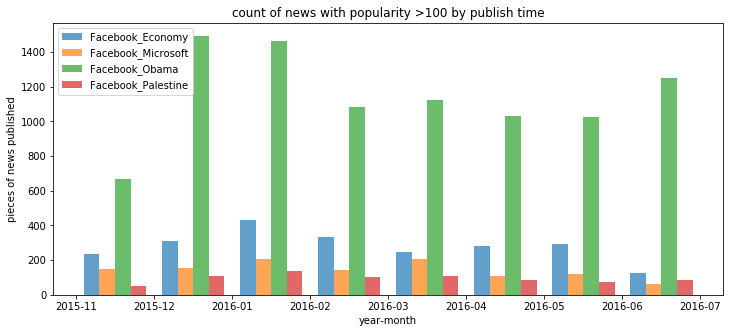

In [12]:
news_final = get_news_final(100)
plat_topic_dict = get_plat_topic(min_popu = 100)
total = []
title = []
for k,v in plat_topic_dict.items():
    title.append(k)
    x = sorted(list(set(v.index)&set(news_final.index)))
    dates = news_final.loc[x]["PublishDate"].values
    total.append([d[:7] for d in dates])
plt.figure(figsize=(12,5))
plt.hist(total,bins = 8,alpha = 0.7)
plt.xlabel("year-month")
plt.ylabel("pieces of news published")
plt.title("count of news with popularity >100 by publish time")
plt.legend(title,loc = "best")
plt.savefig(f"../figures/count of news with popularity larger than 100 by publish time.png",dpi = 200)

In [13]:
def create_tp(start = dt.datetime(2015,11,9), end = dt.datetime(2015,11,15)):
    periods = [str(dt) for dt in pd.date_range(start, end, freq = dt.timedelta(minutes = 20))]
    return periods

In [14]:
tperiod = create_tp()
popu_diff = [[] for _ in range(len(tperiod))]


In [15]:
def popu_diff_dict(tperiod):
    diff_dict = {}
    news_final = get_news_final(min_popu = 0)
    plat_topic_dict = get_plat_topic(min_popu = 0)
    
    for k,v in plat_topic_dict.items():
        print(k)
        popu_diff = [[] for _ in range(len(tperiod))]
        diff = v.replace(-1,0).drop("IDLink",1)
        diff = diff[diff["TS144"]>0]
        diff.values[:,1:] = diff.diff(axis=1).values[:,1:]
        for i in range(diff.shape[0]):
            idl = diff.index[i]
            ts = diff.values[i]
            try:
                pbd = news_final["PublishDate"][idl]
            except:
                continue
            if pbd < tperiod[0] or pbd > tperiod[-1]:
                continue
            for i in range(len(tperiod)-1):
                if pbd < tperiod[i+1]:
                    for j in range(144):
                        if i+j < len(tperiod) and ts[j] > 0:
                            #print(tperiod[i+1], pbd, j, i)
                            popu_diff[i+j].append(ts[j])
                    break
        diff_dict[k] = popu_diff
    return diff_dict
tperiod = create_tp(start = dt.datetime(2015,11,1), end = dt.datetime(2016,8,1))
diff_dict = popu_diff_dict(tperiod)

Facebook_Economy


KeyboardInterrupt: 

In [15]:
import pickle
"""
output = open('diff_dict.pkl', 'wb')
pickle.dump(diff_dict, output)
output.close()
"""
# read python dict back from the file
pkl_file = open('diff_dict.pkl', 'rb')
diff_dict = pickle.load(pkl_file)
pkl_file.close()


In [16]:
"""
output = open('tperiod.pkl', 'wb')
pickle.dump(tperiod, output)
output.close()
"""
# read python dict back from the file
pkl_file = open('tperiod.pkl', 'rb')
tperiod = pickle.load(pkl_file)
pkl_file.close()

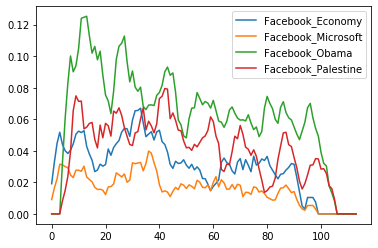

In [28]:
fig, ax = plt.subplots()
for k,v in diff_dict.items():
    econ = np.array([sum(np.log(x)) for x in v])
    econ = econ/max(econ)
    win = 24*7
    econ_avg = np.array([sum(econ[i:i+win])/win for i in range(0,len(econ),win)])
    x = (econ_avg.cumsum()[4:] - econ_avg.cumsum()[:-4])/4
    plt.plot(x,label = k)
    plt.ylim = (0,1000)
ax.legend()
plt.show()

In [4]:
news_final = get_news_final(0)
plat_topic_dict = get_plat_topic(0)
econ = plat_topic_dict["Facebook_Economy"]
obam = plat_topic_dict["Facebook_Obama"]
micr = plat_topic_dict["Facebook_Microsoft"]
pale = plat_topic_dict["Facebook_Palestine"]

In [11]:
s1,s2 = 0,0
for k,v in plat_topic_dict.items():
    joinidx = [i for i in v.index if i in news_final.index]
    s1 += len(joinidx)
    s2 += len(v.index)
    print(k,len(joinidx),len(v.index),len(joinidx)/len(v.index))
print("total",s1,s2,s1/s2)
m_news = econ.append(obam).append(micr).append(pale).drop("IDLink",1).join(news_final,how="left")

Facebook_Economy 29329 29361 0.9989101188651612
Facebook_Microsoft 18133 18139 0.9996692210154915
Facebook_Obama 26601 26612 0.9995866526379077
Facebook_Palestine 7343 7522 0.9762031374634406
total 81406 81634 0.9972070460837397


In [12]:
# from the pymice package 
# https://github.com/RianneSchouten/pymice

import numpy as np
import pandas as pd
import math as ma
import scipy.stats as st

def checks_input_mcar_tests(data):
    """ Checks whether the input parameter of class McarTests is correct
            Parameters
            ----------
            data:
                The input of McarTests specified as 'data'
            Returns
            -------
            bool
                True if input is correct
            """

    if not isinstance(data, pd.DataFrame):
        print("Error: Data should be a Pandas DataFrame")
        return False

    if not any(data.dtypes.values == np.float):
        if not any(data.dtypes.values == np.int):
            print("Error: Dataset cannot contain other value types than floats and/or integers")
            return False

    if not data.isnull().values.any():
        print("Error: No NaN's in given data")
        return False

    return True


def mcar_test(data):
    """ Implementation of Little's MCAR test
    Parameters
    ----------
    data: Pandas DataFrame
        An incomplete dataset with samples as index and variables as columns
    Returns
    -------
    p_value: Float
        This value is the outcome of a chi-square statistical test, testing whether the null hypothesis
        'the missingness mechanism of the incomplete dataset is MCAR' can be rejected.
    """

    if not checks_input_mcar_tests(data):
        raise Exception("Input not correct")

    dataset = data.copy()
    vars = dataset.dtypes.index.values
    n_var = dataset.shape[1]

    # mean and covariance estimates
    # ideally, this is done with a maximum likelihood estimator
    gmean = dataset.mean()
    gcov = dataset.cov()

    # set up missing data patterns
    r = 1 * dataset.isnull()
    mdp = np.dot(r, list(map(lambda x: ma.pow(2, x), range(n_var))))
    sorted_mdp = sorted(np.unique(mdp))
    n_pat = len(sorted_mdp)
    correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
    dataset['mdp'] = pd.Series(correct_mdp, index=dataset.index)

    # calculate statistic and df
    pj = 0
    d2 = 0
    for i in range(n_pat):
        dataset_temp = dataset.loc[dataset['mdp'] == i, vars]
        select_vars = ~dataset_temp.isnull().any()
        pj += np.sum(select_vars)
        select_vars = vars[select_vars]
        means = dataset_temp[select_vars].mean() - gmean[select_vars]
        select_cov = gcov.loc[select_vars, select_vars]
        mj = len(dataset_temp)
        parta = np.dot(means.T, np.linalg.solve(select_cov, np.identity(select_cov.shape[1])))
        d2 += mj * (np.dot(parta, means))

    df = pj - n_var

    # perform test and save output
    p_value = 1 - st.chi2.cdf(d2, df)

    return p_value

#df = pd.read_csv('data/exercise1a.csv')
df = m_news.drop(["Title","Headline","Source","Topic","PublishDate"],1)

print(mcar_test(df))

1.0


In [13]:
m_news = econ.append(obam).append(micr).append(pale).drop("IDLink",1).join(news_final,how="right")

In [17]:
diff = {}
for k,v in diff_dict.items():
    s = np.array([sum(x) for x in v])
    l = np.array([len(x) for x in v])
    a = np.array([0 if len(x) == 0 else sum(x)/len(x) for x in v])
    diff[k] = [s,l,a]

In [18]:
mnews = m_news.values
mnidx = list(m_news.index)
record = []
for i in range(len(mnidx)):
    idl = mnidx[i]
    nf = mnews[i]
    if nf[143] < 1000:
        continue
    sor = nf[147]
    top = nf[148]
    pbd = nf[149]
    stt = nf[150]
    sth = nf[151]
    topic = "Facebook_"+top.capitalize()
    s,l,a = diff[topic]
    i = 0
    for j in range(len(tperiod)-145):
        if pbd < tperiod[j+1]:
            for k in range(144):
                if nf[k] >= 0 and i < 72:
                    pop = nf[k] if i == 0 else nf[k]-nf[k-1]
                    lpop = nf[k-1] - nf[k-2] if k > 1 else -1
                    spop = nf[k-1] if k > 0 else -1
                    pbt = i
                    sums = [*s[i+j-1:i+j-9:-3],*s[i+j-9:i+j-72:-9]]
                    lens = [*l[i+j-1:i+j-9:-3],*l[i+j-9:i+j-72:-9]]
                    avgs = [*a[i+j-1:i+j-9:-3],*a[i+j-9:i+j-72:-9]]
                    record.append([idl,sor,top,pbd,stt,sth,pbt,lpop,spop,*sums,*lens,*avgs,pop])
                i += 1
            break
#record = np.array(record,dtype="O")                

KeyboardInterrupt: 

In [19]:
x1 = ["sum-tpop-" + str(i) for i in range(10)]
x2 = ["sum-tnum-" + str(i) for i in range(10)]
x3 = ["sum-tavg-" + str(i) for i in range(10)]
columns = ["IDLink","Source","Topic","PublishDate","sentimenttitle","sentimenthead","publish-tp","last-popu","sum-popu",*x1,*x2,*x3,"POPU"]
len(columns)

40

In [21]:
#record_df = pd.DataFrame(arr_rec, columns = columns)
#record_df.to_csv("record_df.csv")

In [22]:
df = pd.read_csv("record_df.csv")
#df = df[df["POPU"]>-1]
#df = df[df["publish-tp"] < 3]

In [24]:
df.columns

Index(['Unnamed: 0', 'IDLink', 'Source', 'Topic', 'PublishDate',
       'sentimenttitle', 'sentimenthead', 'publish-tp', 'last-popu',
       'sum-popu', 'sum-tpop-0', 'sum-tpop-1', 'sum-tpop-2', 'sum-tpop-3',
       'sum-tpop-4', 'sum-tpop-5', 'sum-tpop-6', 'sum-tpop-7', 'sum-tpop-8',
       'sum-tpop-9', 'sum-tnum-0', 'sum-tnum-1', 'sum-tnum-2', 'sum-tnum-3',
       'sum-tnum-4', 'sum-tnum-5', 'sum-tnum-6', 'sum-tnum-7', 'sum-tnum-8',
       'sum-tnum-9', 'sum-tavg-0', 'sum-tavg-1', 'sum-tavg-2', 'sum-tavg-3',
       'sum-tavg-4', 'sum-tavg-5', 'sum-tavg-6', 'sum-tavg-7', 'sum-tavg-8',
       'sum-tavg-9', 'POPU'],
      dtype='object')

In [25]:
df_encode = pd.DataFrame(index = df["IDLink"])
onehot_columns = ['Topic']
logmarker = ["sum-tpop-", "sum-tavg-","POPU","sum-popu","last-popu"]
drop = ["Unnamed: 0","IDLink","Source","PublishDate"]
keep = ["sentimenttitle","sentimenthead"]

dfn = df.drop(drop,1)

enc = OneHotEncoder(sparse=False, handle_unknown = 'ignore') 

onehot_values = enc.fit_transform(dfn[onehot_columns])
onehot_catos = enc.categories_
idx = 0
for i in range(len(onehot_columns)):
    column = onehot_columns[i]
    catos = onehot_catos[i]
    for j in range(len(catos)):
        name = column + '_' + catos[j]
        df_encode[name] = onehot_values[:,idx]
        idx += 1
dfn.drop(onehot_columns,1,inplace=True)

for i in dfn.columns:
    for j in logmarker:
        if j in i:
            dfn[i] = np.log(2+dfn[i].values)
        
scaler = MinMaxScaler()

for i in dfn.columns:
    if i in keep:
        df_encode[i] = dfn[i].values
        continue
    df_encode[i] = scaler.fit_transform(dfn[[i]])
#df_encode.to_csv("encode_df.csv")


In [26]:
data = pd.read_csv("encode_df.csv").set_index("IDLink")
data.shape

(121049, 40)

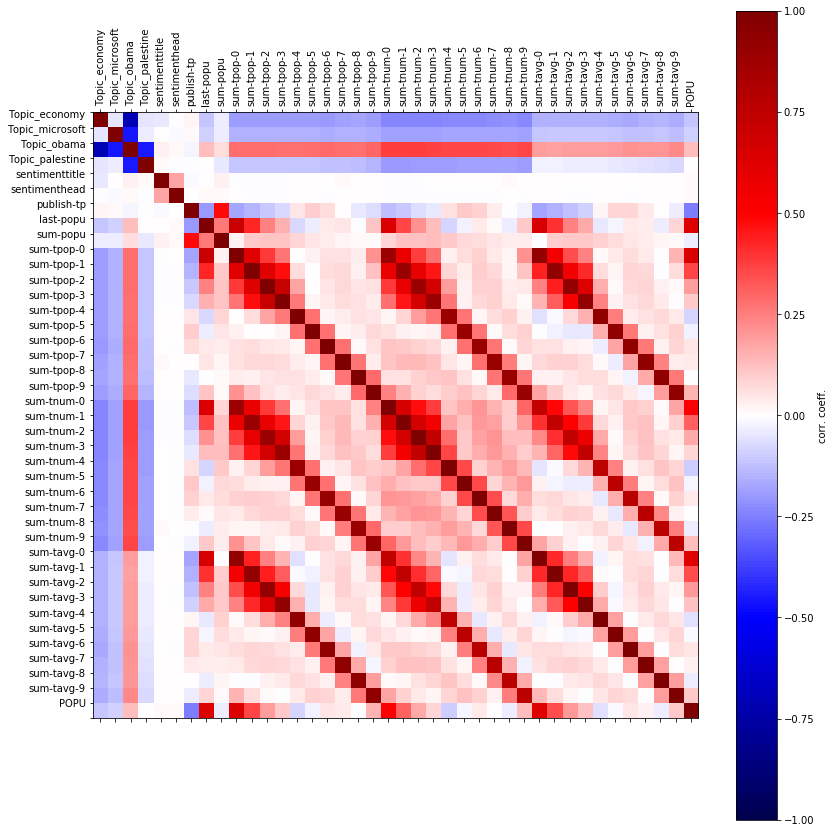

In [27]:
plt.figure(figsize=(12,12))

plt.matshow(data.corr(),vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
cols = data.corr().columns
plt.xticks(np.arange(len(cols)),list(cols),rotation=90)
plt.yticks(np.arange(len(cols)+1)-0.5,list(cols))
plt.tight_layout()
#plt.savefig('../figures/corr_coeff.png',dpi=300)
plt.show()

In [28]:
plt.figure()
corrmat = data.corr()
all_cols = corrmat.sort_values('POPU',ascending=False)['POPU'].index 
cols = [c for c in [*all_cols[:5],*all_cols[-7:]] if '_'not in c]
pd.plotting.scatter_matrix(data[cols],c = data['POPU'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=10, alpha=.8);
#plt.savefig("../figures/plotting scatter matrix.png",dpi=200)

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

Error in callback <function flush_figures at 0x000001E8E90CF798> (for post_execute):


KeyboardInterrupt: 

(0.3403768896577121, 0.34388329590777056)

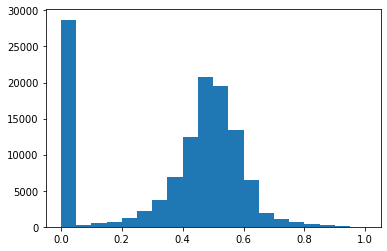

In [29]:
plt.hist(data["sum-tpop-1"],bins=20)
sorted(data["sum-tpop-1"])[data.shape[0]//100*30],sorted(data["sum-tpop-0"])[data.shape[0]//100*30]

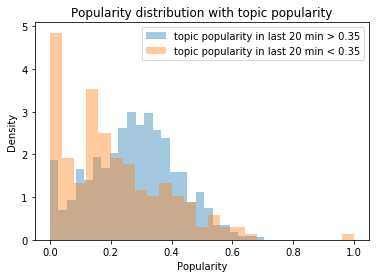

In [33]:
p = 0.35
fig, ax = plt.subplots(sharex = True)
ax.hist(data[(data["sum-tpop-0"] >p)&(data["publish-tp"]<0.03)]["POPU"].values,bins=25,alpha = 0.4,density = True,label=f"topic popularity in last 20 min > {p}")
ax.hist(data[(data["sum-tpop-0"] <=p)&(data["publish-tp"]<0.03)]["POPU"].values,bins=25,alpha = 0.4,density = True,label=f"topic popularity in last 20 min < {p}")
plt.ylabel("Density")
plt.xlabel("Popularity")
plt.title("Popularity distribution with topic popularity")
ax.legend();

#plt.savefig("../figures/Popularity distribution with topic popularity.png",dpi =200)

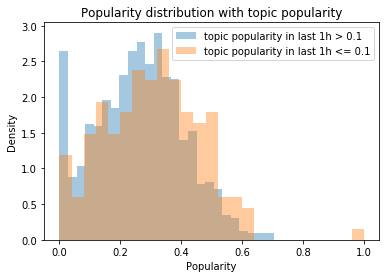

In [655]:
p = 0.1
fig, ax = plt.subplots()
ax.hist(data[(data["sum-tpop-1"] >p)&(data["publish-tp"]<0.03)]["POPU"].values,bins=25,alpha = 0.4,density = True,label=f"topic popularity in last 1h > {p}")
ax.hist(data[(data["sum-tpop-1"] <=p)&(data["publish-tp"]<0.03)]["POPU"].values,bins=25,alpha = 0.4,density = True,label=f"topic popularity in last 1h <= {p}")
plt.ylabel("Density")
plt.xlabel("Popularity")
plt.title("Popularity distribution with topic popularity")
ax.legend();
#plt.savefig("../figures/Popularity distribution with topic popularity2.png",dpi =200)

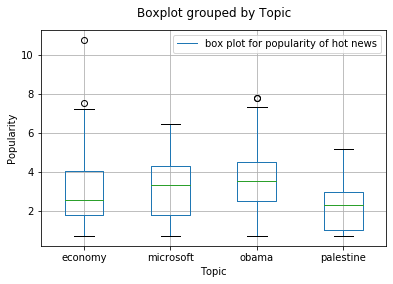

In [562]:
df[['Topic',"POPU"]].boxplot(by="Topic")
#plt.figure()
plt.ylabel('Popularity')
plt.xlabel("Topic")
plt.title("")
ax = plt.gca()
ax.legend(["box plot for popularity of hot news"])
#ax.set_ylim((-1,500))
#plt.savefig('figures/boxplot.png',dpi=300)

plt.savefig("../figures/box plot for popularity of hot news.png",dpi =200)

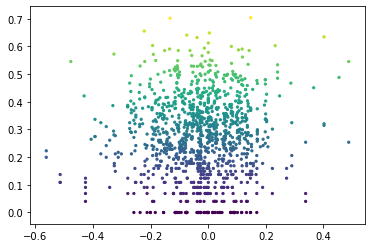

In [559]:
plt.scatter(data[data["Topic_obama"]==1]["sentimenthead"],data[data["Topic_obama"]==1]["POPU"],c = data[data["Topic_obama"]==1]["POPU"],s = 5)

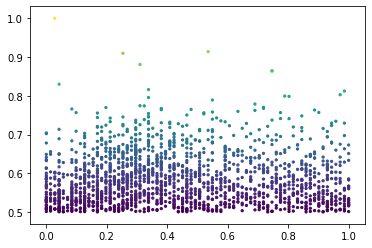

In [643]:
plt.scatter(data[data["POPU"]>0.5]["publish-tp"],data[data["POPU"]>0.5]["POPU"],c = data[data["POPU"]>0.5]["POPU"],s = 5)

In [2]:
import datetime as dt
def create_record_by_time(start = dt.datetime(2015,11,9), end = dt.datetime(2015,11,20)):
    periods = pd.date_range(start, end, freq = dt.timedelta(minutes = 20))
    record_by_time = pd.DataFrame(columns = [str(p) for p in periods], index = news_final.index)
    return record_by_time

In [67]:
def fill_record(record_by_time, fb_econ, news_final):
    p1 = 0
    for x in news_final.index:
        pb_date = news_final.loc[x]["PublishDate"]
        if x not in fb_econ.index:
            continue
        ts = fb_econ.loc[x][1:]
        while p1 < record_by_time.shape[1] and record_by_time.columns[p1] < pb_date:
            p1 += 1
        if p1 >= record_by_time.shape[1] or record_by_time.columns[p1] < pb_date:
            break
        if p1>0: p1 -= 1
        p3 = p1
        #print(p1,p3)
        #print(x,record_by_time.columns[p1], pb_date,p1)
        for p2 in range(144):
            if ts[p2] < 0: continue
            if p3+p2 >= record_by_time.shape[1]:break
            record_by_time.loc[x][p3+p2] = ts[p2]-ts[p2-1]

In [72]:
ts_dict = get_plat_topic(min_popu = 10)
news_final = get_news_final(min_popu = 10)
record_by_time = create_record_by_time(start = dt.datetime(2015,11,1), end = dt.datetime(2016,8,1))
for k,v in ts_dict.items():
    fill_record(record_by_time, v, news_final)

ValueError: too many values to unpack (expected 2)

In [78]:
#record_by_time.to_csv('record_by_time.csv')

In [79]:
record_by_time.shape

(37977, 19729)

In [89]:
record_by_time.iloc[:,1190:1300].sum()

2015-11-17 12:40:00    110.0
2015-11-17 13:00:00      0.0
2015-11-17 13:20:00      0.0
2015-11-17 13:40:00      0.0
2015-11-17 14:00:00    683.0
                       ...  
2015-11-18 23:40:00      0.0
2015-11-19 00:00:00      0.0
2015-11-19 00:20:00      0.0
2015-11-19 00:40:00      0.0
2015-11-19 01:00:00      0.0
Length: 110, dtype: float64

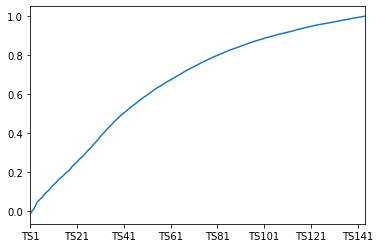

In [112]:
x1 = process_ts(ts_dict["Facebook_Economy"]).iloc[:,141]
x2 = process_ts(ts_dict["Facebook_Economy"]).iloc[:,140]
process_ts(ts_dict["Facebook_Economy"]).mean().plot()

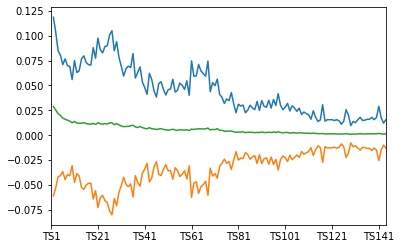

In [197]:
fb_econ = process_ts(ts_dict["Facebook_Obama"])
#fb_econ[fb_econ["TS1"]>0].mean().plot()
x = fb_econ[fb_econ["TS1"]>0].diff(axis = 1)
(x.mean()+1.96*x.std()).plot()
(x.mean()-1.96*x.std()).plot()
(x.mean()).plot()


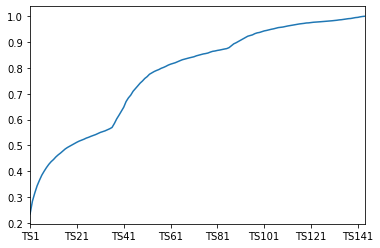

In [122]:
fb_econ = process_ts(ts_dict["Facebook_Microsoft"])
fb_econ[fb_econ["TS1"]>0].mean().plot()

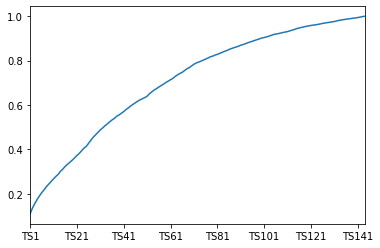

In [123]:
fb_econ = process_ts(ts_dict["Facebook_Palestine"])
fb_econ[fb_econ["TS1"]>0].mean().plot()

In [132]:
econ_idx = [i for i in fb_econ.index if i in record_by_time.index]

In [135]:
econ_ts = record_by_time.loc[econ_idx]

In [137]:
econ_sum = econ_ts.sum()

In [143]:
record_by_time.min()

2015-11-01 00:00:00   NaN
2015-11-01 00:20:00   NaN
2015-11-01 00:40:00   NaN
2015-11-01 01:00:00   NaN
2015-11-01 01:20:00   NaN
                       ..
2016-07-31 22:40:00   NaN
2016-07-31 23:00:00   NaN
2016-07-31 23:20:00   NaN
2016-07-31 23:40:00   NaN
2016-08-01 00:00:00   NaN
Length: 19729, dtype: float64

(array([238.,   0.,   0., 308.,   0.,   0., 431.,   0.,   0., 333.,   0.,
          0., 247.,   0.,   0., 282.,   0.,   0., 291.,   0.,   0., 125.]),
 array([0.        , 0.31818182, 0.63636364, 0.95454545, 1.27272727,
        1.59090909, 1.90909091, 2.22727273, 2.54545455, 2.86363636,
        3.18181818, 3.5       , 3.81818182, 4.13636364, 4.45454545,
        4.77272727, 5.09090909, 5.40909091, 5.72727273, 6.04545455,
        6.36363636, 6.68181818, 7.        ]),
 <a list of 22 Patch objects>)

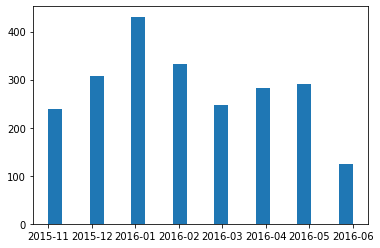

In [389]:
fb_econ = process_ts(ts_dict["Facebook_Economy"])
x = sorted(list(set(fb_econ.index)&set(news_final.index)))
dates = news_final.loc[x]["PublishDate"].values
plt.hist([d[:7] for d in dates],bins = 22)

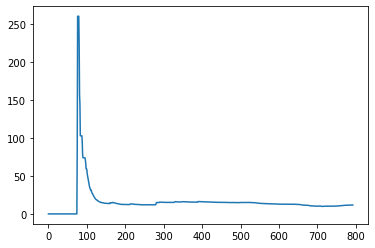

In [512]:
plt.plot([sum(x)/len(x) if len(x)>0 else 0 for x in popu_diff])

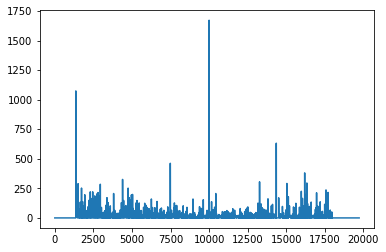

In [559]:
plt.plot([sum(x)/len(x) if len(x)>0 else 0 for x in diff_dict["Facebook_Obama"]])

In [516]:
tperiod[650]

'2015-11-10 00:40:00'

In [538]:
k = 651
print(tperiod[k])
diff_dict["Facebook_Economy"][k]

2015-11-10 01:00:00


[3, 52, 88, 28, 1, 1, 27, 2, 1]

In [550]:
fb_econ.loc[15][3*25+1:3*26]

TS76     -1
TS77    108
Name: 15, dtype: int64

(0, 1000)

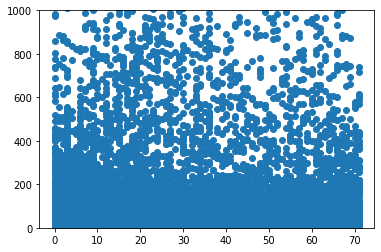

In [23]:
plt.scatter(df["publish-tp"],df["POPU"])
ax = plt.gca()
ax.set_ylim([0,1000])
#ax.set_xlim([0,10])

Text(0, 0.5, 'Density')

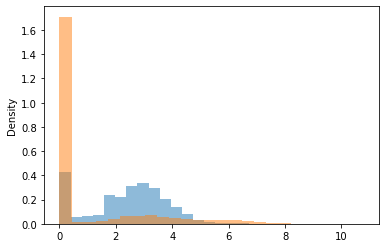

In [596]:
p = 2
plt.hist(np.log(1+df[df["sum-tpop-1"] >=p]["POPU"].values),bins=25,alpha = 0.5,density = True)
plt.hist(np.log(1+df[df["sum-tpop-1"] <p]["POPU"].values),bins=25,alpha = 0.5,density = True)
plt.ylabel("Density")

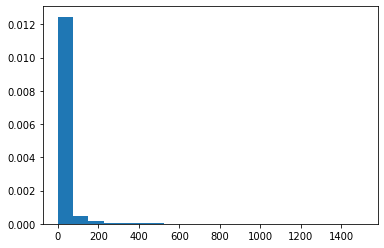

In [298]:
plt.hist(1+df["last-popu"].values,density = True,bins=20);
ax = plt.gca()
#ax.set_ylim((0,0.0001))